# Team Lost in the Forest's Swan Consulting Project
<p>
    By: Kal P., Edward B. & Joel U.
</p>

## Contents

* ### 1. EDA
    * 1.1 Importing data
    * 1.2 Checking data types and null values
    * 1.3 Check for outliers
    * 1.4 Correlation between features
    * 1.5 Check for duplicates
*  ### 2. Machine Learning
    * 2.1 Feature engineering function
    * 2.2 Functions for metrics
    * 2.3 Train Test Split
    * 2.4 Grid Search
    * 2.5 Recursive feature elimination with cross-validation
    * 2.6 Random forest classifier and metrics
*  ### 3. Potential churners
    * 3.1 All customers that are not churning
    * 3.2 Top 500 customers that might churn
    * 3.3 CSV files for the potential churn customers

In [75]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import metrics
from time import time

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import tree

## 1. EDA

### 1.1 Importing data

In [76]:
df = pd.read_excel("1 - Project Data.xlsx")
pd.set_option('display.max_columns', 32)

In [77]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


### 1.2 Checking data types and null values

In [78]:
df.shape

(7043, 31)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [80]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Reason         5174
dtype: int64

There are null values in 'Churn Reason' because not everyone in the data has churned.

In [81]:
df['Churn Value'].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

### 1.3 Check for outliers

Total charge was an object so it has now been changed to a float.

In [82]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce').fillna(0)
df['Total Charges'] = df['Total Charges'].astype(float)

In [83]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2279.734304,0.265370
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.794470,0.441561
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,0.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,398.550000,0.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1394.550000,0.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3786.600000,1.000000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000


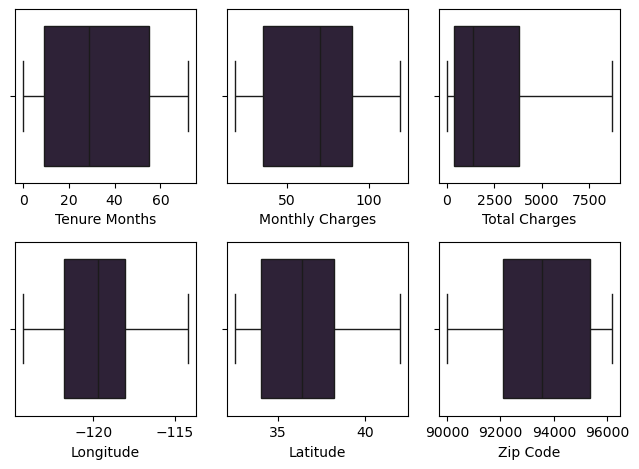

In [89]:
fig,axis=plt.subplots(2, 3) 
sns.boxplot(df['Tenure Months'],orient='h',ax=axis[0,0])
sns.boxplot(df['Monthly Charges'],orient='h',ax=axis[0,1])
sns.boxplot(df['Total Charges'],orient='h',ax=axis[0,2])
sns.boxplot(df['Longitude'],orient='h',ax=axis[1,0])
sns.boxplot(df['Latitude'],orient='h',ax=axis[1,1])
sns.boxplot(df['Zip Code'],orient='h',ax=axis[1,2])
sns.set_palette('mako')
fig.tight_layout()
plt.show()

No outliers in the data

### 1.4 Correlation between features

In [85]:
dfcorr = df.corr(numeric_only = True)

<Axes: >

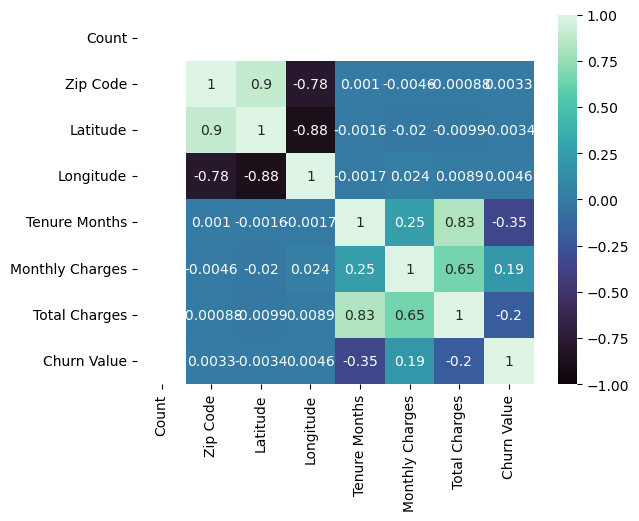

In [86]:
sns.heatmap(data = dfcorr,
           annot = True,
           cmap = 'mako',
           vmin = -1,
           vmax = 1)

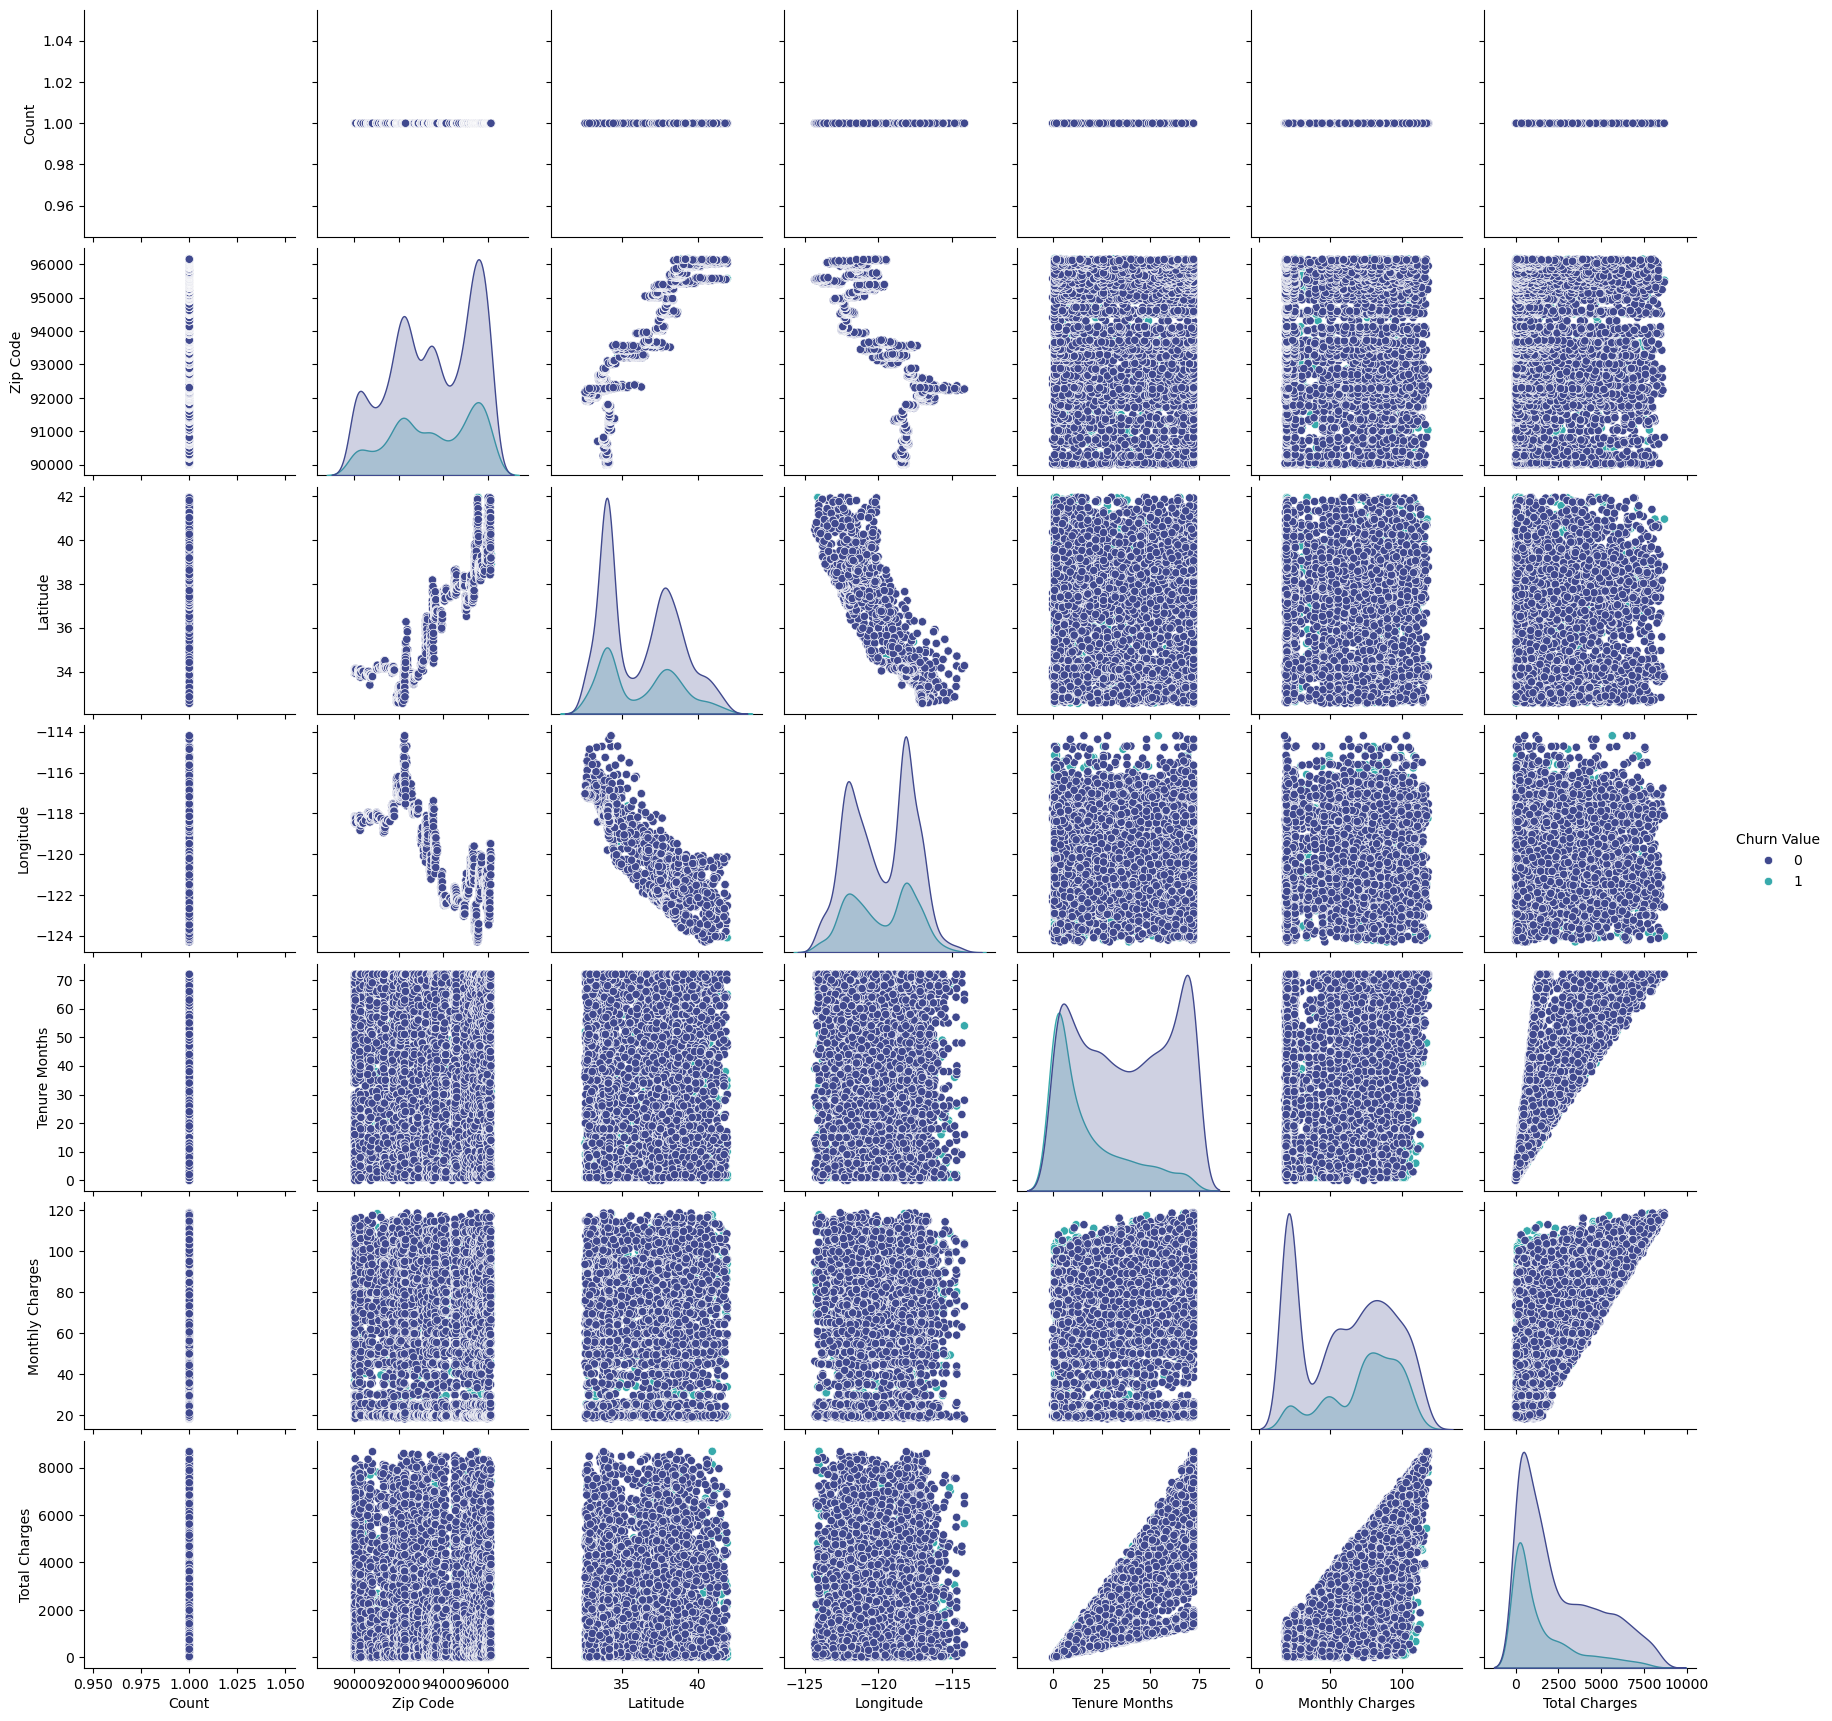

In [87]:
sns.pairplot(df,hue='Churn Value',palette='mako')
plt.show()

### 1.5 Check for duplicates

In [46]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.shape

(0, 31)

No duplicates in the data

## 2. Machine Learning

### 2.1 Feature engineering function

In [47]:
def speed_clean(df):
    df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce').fillna(0)
    df['Total Charges'] = df['Total Charges'].astype(float)
    df['Gender'] = df.Gender.map({'Female':0, 'Male':1})
    df['Senior Citizen'] = df['Senior Citizen'].map({'No':0, 'Yes':1})
    df['Partner'] = df.Partner.map({'No':0, 'Yes':1})
    df['Dependents'] = df.Dependents.map({'No':0, 'Yes':1})
    df['Phone Service'] = df['Phone Service'].map({'No':0, 'Yes':1})
    df['Streaming TV'] = df['Streaming TV'].map({'No':0, 'Yes':1})
    df['Paperless Billing'] = df['Paperless Billing'].map({'No':0, 'Yes':1})
    
    df = pd.get_dummies(df, columns=['Internet Service'], prefix='Internet Service', drop_first=True,dtype=int)
    df = pd.get_dummies(df, columns=['Contract'], prefix='Contract', drop_first=True,dtype=int)
    df = pd.get_dummies(df, columns=['Payment Method'], prefix='Payment Method', drop_first=True,dtype=int)

    return df

In [48]:
dffe=speed_clean(df)

In [49]:
dffe.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,1,0,0,0,2,1,No,...,No,0.0,No,1,53.85,108.15,Yes,1,Competitor made better offer,0,0,0,0,0,0,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,0,0,0,1,2,1,No,...,No,0.0,No,1,70.70,151.65,Yes,1,Moved,1,0,0,0,0,1,0
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,0,0,0,1,8,1,Yes,...,No,1.0,Yes,1,99.65,820.50,Yes,1,Moved,1,0,0,0,0,1,0
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,0,0,1,1,28,1,Yes,...,Yes,1.0,Yes,1,104.80,3046.05,Yes,1,Moved,1,0,0,0,0,1,0
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,1,0,0,1,49,1,Yes,...,No,1.0,Yes,1,103.70,5036.30,Yes,1,Competitor had better devices,1,0,0,0,0,0,0


### 2.2 Functions for metrics

In [68]:
'''Functions created by Digital Futures'''
def apr(y_pred, y_real):
    accuracy = metrics.accuracy_score(y_real, y_pred)
    precision = metrics.precision_score(y_real, y_pred)
    recall = metrics.recall_score(y_real, y_pred)
    f1 = metrics.f1_score(y_real, y_pred)
    
    print(f"Accuracy:{accuracy}")
    print(f"Precision:{precision}")
    print(f"Recall:{recall}")
    print(f"F1:{f1}")
    return accuracy, precision, recall, f1


##

def produce_confusion(positive_label, negative_label, cut_off, df, y_pred_name, y_real_name):
    
    #Set pred to 0 or 1 depending on whether it's higher than the cut_off point.
    
    if cut_off != 'binary':      
        df['pred_binary'] = np.where(df[y_pred_name] > cut_off , 1, 0)
    else: 
        df['pred_binary'] = df[y_pred_name]
    
    #Build the CM
    cm = confusion_matrix(y_real_name, df['pred_binary'])  
    
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g',cmap='mako'); 

    # labels, title, ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('Real labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels([negative_label, positive_label])
    ax.yaxis.set_ticklabels([negative_label, positive_label]);

    print('Test accuracy = ', accuracy_score(y_real_name, df['pred_binary']))

    return accuracy_score(y_real_name, df['pred_binary'])

### 2.3 Train Test Split

In [51]:
feature_drop=['Multiple Lines','Online Security','Online Backup','Device Protection',
             'Tech Support','Streaming TV','Streaming Movies','Count', 'State', 
             'Country', 'CustomerID','City','Lat Long','Churn Label',
             'Churn Value','Churn Reason','Zip Code']
features=list(dffe.drop(feature_drop,axis=1).columns)


In [52]:
X=dffe[features].copy()
y=dffe['Churn Value'].copy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

### 2.4 Grid Search

__CAUTION__ Running grid search takes time and should only be done to see how it works, please move on to section __2.5__.

In [32]:
temp_rf =RandomForestClassifier(random_state= 7 )

rf_params = {'n_estimators': [100, 150, 200,400],
             'max_depth': [None, 5,10,20,30],
             'bootstrap': [True, False],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10],
             }

gs = GridSearchCV(temp_rf, param_grid=rf_params, cv=5)
gs.fit(X_train, y_train);


In [ ]:
print(gs.best_score_)

gs.best_params_

### 2.5 Recursive feature elimination with cross-validation

An Sklearn method used for feature selection

In [53]:
rf =RandomForestClassifier(bootstrap= True,max_depth= 10,max_features= 'sqrt',
                           min_samples_leaf= 1,min_samples_split= 5,
                           n_estimators= 150,random_state= 7 )

selector=RFECV(rf, step=1, cv=5)
selector.fit(X_train, y_train);

In [54]:
features=list(selector.get_feature_names_out(features))
print(features)

['Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Paperless Billing', 'Monthly Charges', 'Total Charges', 'Internet Service_Fiber optic', 'Internet Service_No', 'Contract_One year', 'Contract_Two year', 'Payment Method_Credit card (automatic)', 'Payment Method_Electronic check', 'Payment Method_Mailed check']


In [55]:
selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

### 2.6 Random forest classifier and metrics

In [56]:
rf.fit(X_train[features],y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=150,
                       random_state=7)

In [62]:
cop=X_test.copy()
cop[['prob_stay', 'prob_churn']]=rf.predict_proba(X_test[features])
cop['y_pred'] = np.where(cop['prob_churn']>.3, 1, 0)

In [63]:
apr(cop['y_pred'], y_test)

Accuracy:0.7757274662881476
Precision:0.5752688172043011
Recall:0.8025
F1:0.6701461377870563


(0.7757274662881476, 0.5752688172043011, 0.8025, 0.6701461377870563)

Test accuracy =  0.7757274662881476


0.7757274662881476

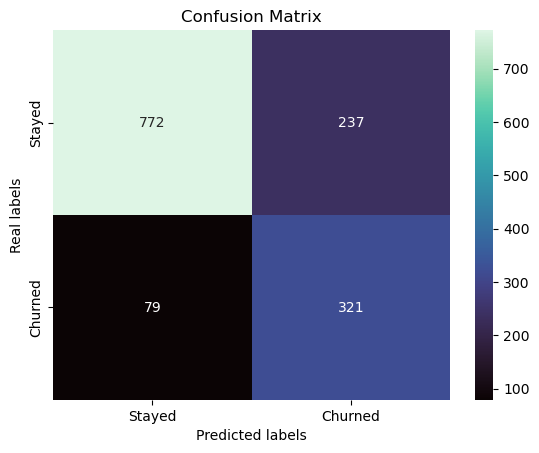

In [69]:
produce_confusion('Churned', 'Stayed', 0.3, cop, 'prob_churn', y_test)

## 3. Potential churners

In [70]:
df_copy=df.copy()
df_copy[['prob_stay', 'prob_churn']]=rf.predict_proba(X)

### 3.1 All customers that are not churning

In [71]:
churn_risk=df_copy[df_copy['Churn Value']==0].sort_values('prob_churn',ascending=False).copy()
churn_risk.shape

(5174, 33)

### 3.2 Top 500 customers that might churn

In [72]:
top_churn=churn_risk.head(500).copy()
top_churn.shape

(500, 33)

In [74]:
top_churn.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason,prob_stay,prob_churn
5657,7577-SWIFR,1,United States,California,Glendale,91206,"34.162515, -118.203869",34.162515,-118.203869,1,0,0,0,1,1,No,...,No,No,No,No,1.0,Yes,Month-to-month,1,Electronic check,89.25,89.25,No,0,NaN,0.083574,0.916426
2676,7439-DKZTW,1,United States,California,Paicines,95043,"36.525703, -120.952122",36.525703,-120.952122,1,0,0,0,1,1,No,...,No,No,No,No,1.0,No,Month-to-month,1,Electronic check,80.55,80.55,No,0,NaN,0.087379,0.912621
3518,1393-IMKZG,1,United States,California,Fullerton,92831,"33.879983, -117.895482",33.879983,-117.895482,0,0,0,0,1,1,No,...,No,No,No,Yes,1.0,Yes,Month-to-month,1,Electronic check,95.85,95.85,No,0,NaN,0.091815,0.908185
2215,1452-VOQCH,1,United States,California,Hinkley,92347,"34.983808, -117.239306",34.983808,-117.239306,1,0,0,0,1,1,Yes,...,No,No,No,No,0.0,No,Month-to-month,1,Electronic check,75.10,75.10,No,0,NaN,0.104079,0.895921
3662,9603-OAIHC,1,United States,California,Palmdale,93551,"34.613476, -118.256358",34.613476,-118.256358,1,1,0,0,1,1,No,...,No,No,No,No,0.0,No,Month-to-month,1,Electronic check,70.05,70.05,No,0,NaN,0.145650,0.854350


### 3.3 CSV files for the potential churn customers

In [73]:
churn_risk[['CustomerID', 'prob_churn']].to_csv("Churn_risk.csv", index=False)
top_churn[['CustomerID', 'prob_churn']].to_csv("Top_500.csv", index=False)